In [48]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tensorflow import keras

In [49]:
img = io.imread('backend-fastapi/uploads/six.png')

In [50]:
img.shape

(280, 280, 4)

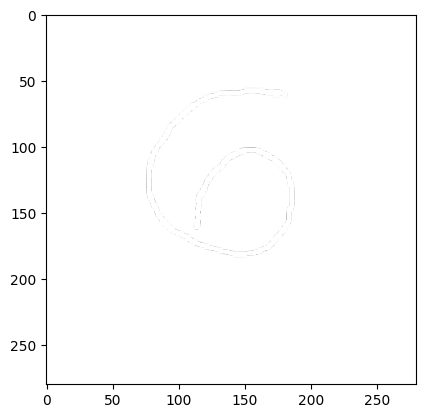

In [51]:
plt.imshow(img)

In [53]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.TFSMLayer(
        "models/digit_model_improved/1",  # 👈 directory, NOT saved_model.pb
        call_endpoint="serve"
    )
])

In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfsm_layer_2 (TFSMLayer)        │ (None, 10)             │       567,434 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
img.shape

(280, 280, 4)

In [56]:
import numpy as np
from PIL import Image

# 1. Convert numpy → PIL
image = Image.fromarray(img.astype("uint8"), mode="RGBA")

# 2. Convert to grayscale
image = image.convert("L")

# 3. Resize to MNIST resolution
image = image.resize((28, 28), Image.BILINEAR)

# 4. Convert back to numpy
image = np.array(image).astype("float32")

# 5. Normalize
image /= 255.0

# 6. Flatten + batch dimension
image = image.reshape(1, 784)

In [57]:
image.shape

(1, 784)

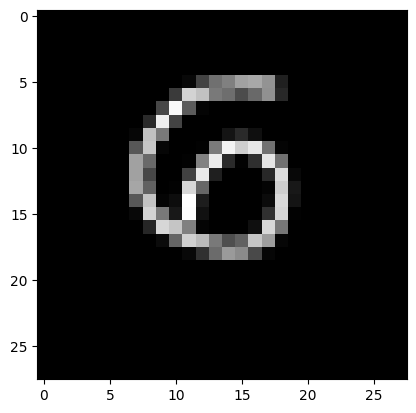

In [58]:
plt.imshow(image.reshape(28, 28), cmap='gray')

In [59]:
image.shape

(1, 784)

In [60]:
result = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [61]:
result

array([[0.05547182, 0.0057489 , 0.02378023, 0.01342439, 0.16561833,
        0.02990212, 0.02034076, 0.04091478, 0.18056507, 0.46423358]],
      dtype=float32)

In [62]:
result.shape

(1, 10)

In [63]:
pred_digit = np.argmax(result, axis=1)[0]

print("Predicted digit:", pred_digit)

Predicted digit: 9


In [64]:
confidence = np.max(result)
print("Confidence:", confidence)

Confidence: 0.46423358
